In [25]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [26]:
train = datasets.MNIST('../../../datasets/pytorch/', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('../../../datasets/pytorch/', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [27]:
# Feed Forward NN
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


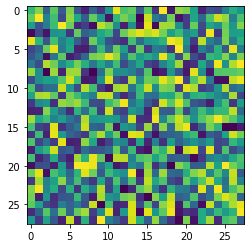

In [28]:
X = torch.rand((28, 28))

plt.imshow(X)
plt.show()

In [30]:
X = X.view(-1, 28**2)
output = net(X)
output

tensor([[-2.2758, -2.3846, -2.3545, -2.2661, -2.2183, -2.2718, -2.3559, -2.3451,
         -2.3628, -2.2094]], grad_fn=<LogSoftmaxBackward0>)